In [ ]:
!pip install nbformat

Defaulting to user installation because normal site-packages is not writeable


In [2]:
%run Project_3_Step_0_InitVar.ipynb
Config.pre_resampling = False #Without pre_resampling

Config value
dropna: False
dropna_subset: []
pre_resampling: False
remove_features: []
selected_locations: []
--------------------


Defaulting to user installation because normal site-packages is not writeable
Config value
dropna: False
dropna_subset: []
pre_resampling: False
remove_features: []
selected_locations: []
--------------------


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Config value
dropna: False
dropna_subset: []
pre_resampling: False
remove_features: []
selected_locations: []
--------------------


C:\Users\brian\AppData\Local\Temp\ipykernel_18868\2072590195.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data.groupby('Location').apply(lambda group: group.notna().all(axis=1).sum()).sort_values(ascending=False)


103909
41551

0.2856524130345112


C:\Users\brian\AppData\Local\Temp\ipykernel_18868\4035099515.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.groupby('Location').apply(lambda group: group.ffill()).reset_index(drop=True)
C:\Users\brian\AppData\Local\Temp\ipykernel_18868\4035099515.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('Location').apply(lambda group: group.ffill()).reset_index(drop=True)


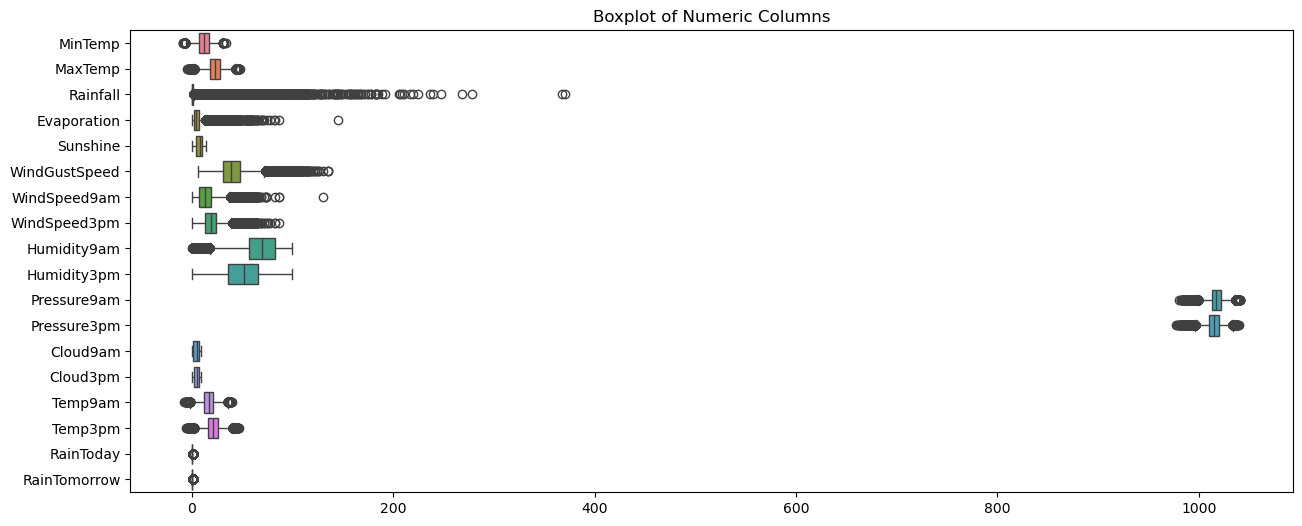

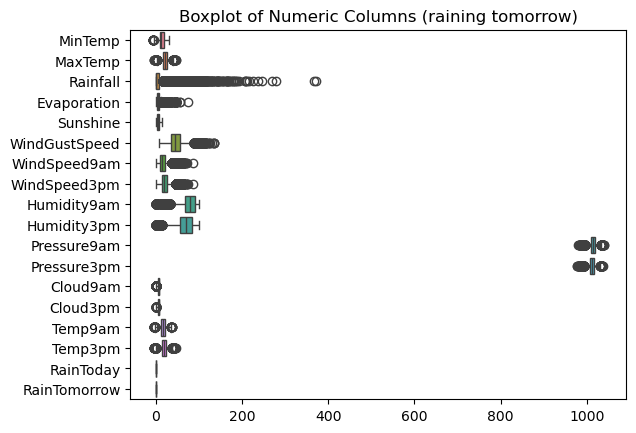

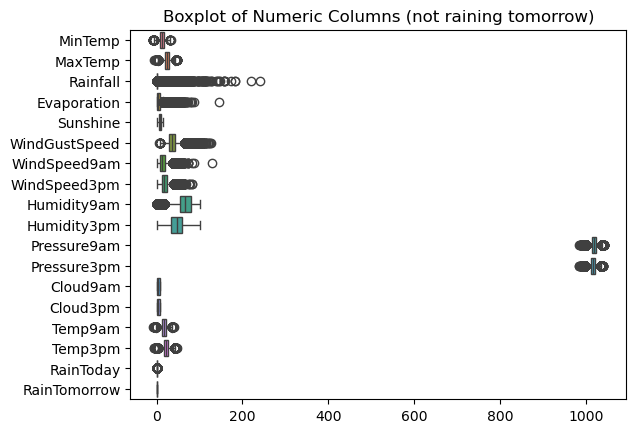

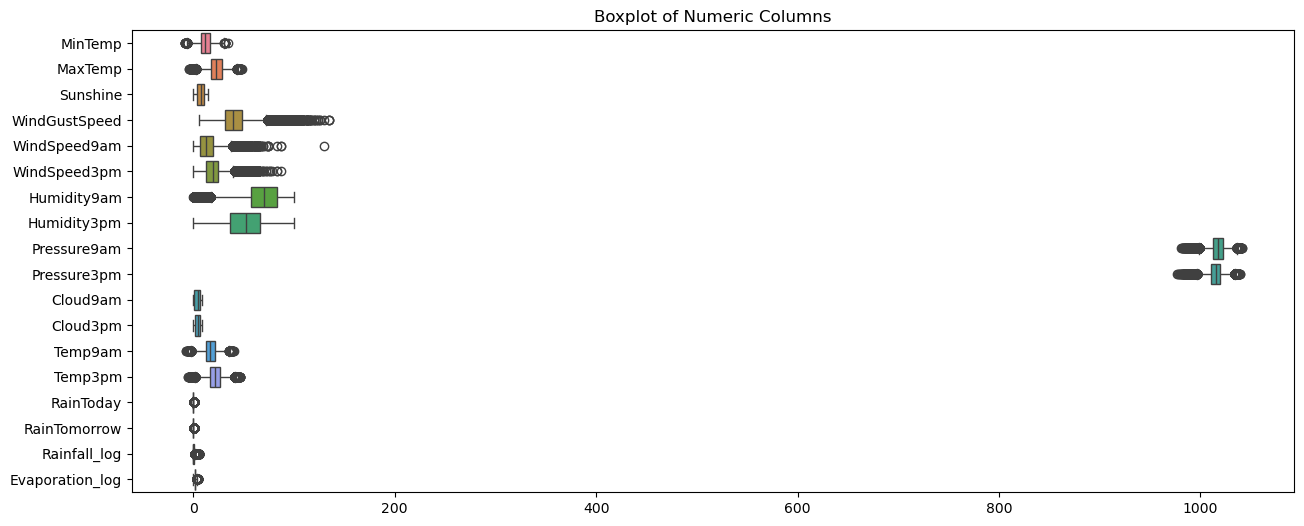

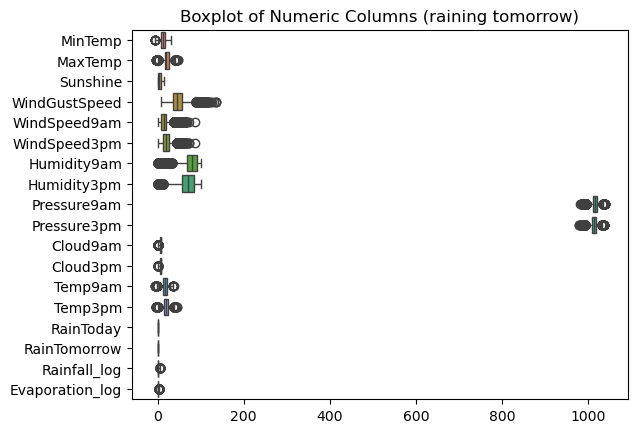

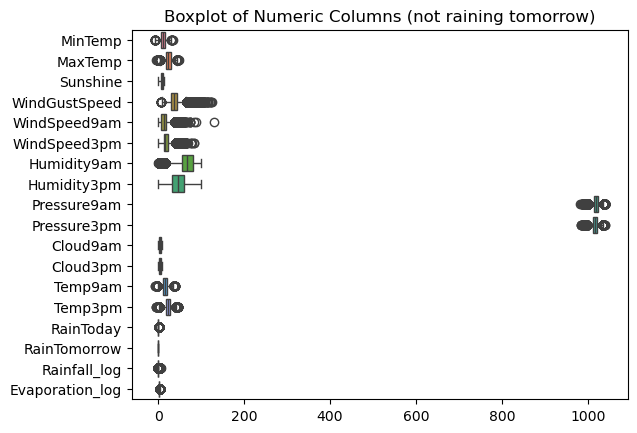

<Figure size 640x480 with 0 Axes>

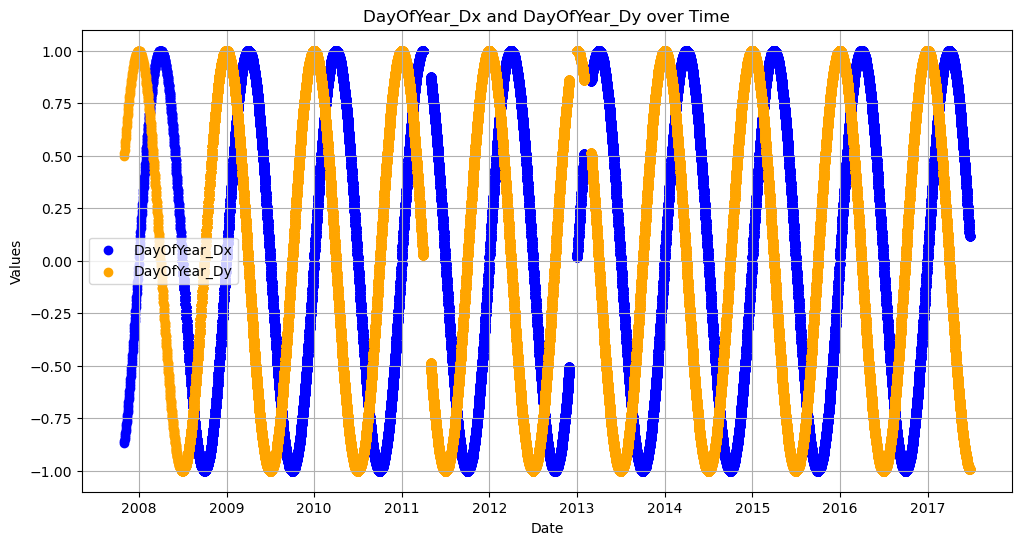

<Figure size 640x480 with 0 Axes>

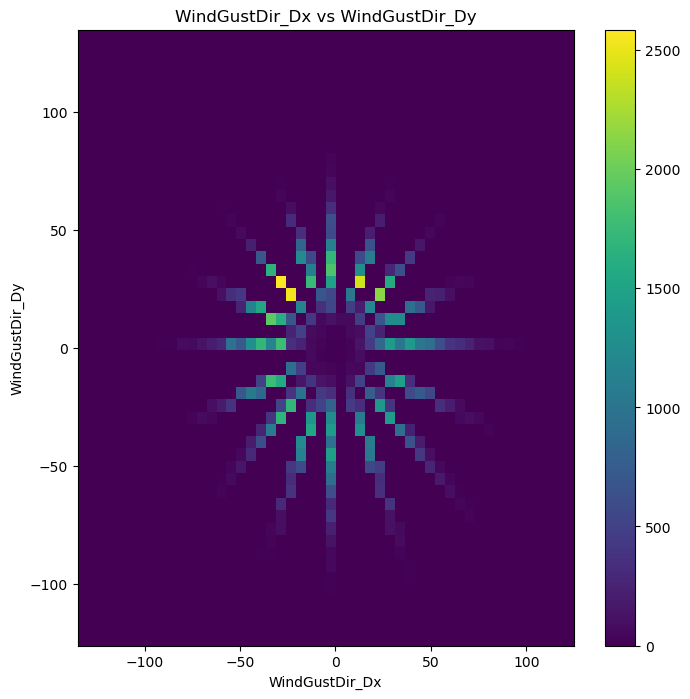

Date                           datetime64[ns]
MinTemp                               float64
MaxTemp                               float64
Sunshine                              float64
Humidity9am                           float64
Humidity3pm                           float64
Pressure9am                           float64
Pressure3pm                           float64
Cloud9am                              float64
Cloud3pm                              float64
Temp9am                               float64
Temp3pm                               float64
RainToday                             float64
RainTomorrow                          float64
Rainfall_log                          float64
Evaporation_log                       float64
DayOfYear                               int32
DayOfYear_Dx                          float64
DayOfYear_Dy                          float64
WindGustDir_Dx                        float64
WindGustDir_Dy                        float64
WindDir9am_Dx                     

'Project_3_Step_4_1_ML_Case1.GridSearchCV.ipynb'

In [3]:

%run Project_3_Step_3_1_ML_Sampling.ipynb
os.path.basename(__vsc_ipynb_file__)

In [4]:
%run Project_3_Step_4_0_ML_Score_Method.ipynb

Defaulting to user installation because normal site-packages is not writeable


* Import Module for Training

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report   

import time
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# scaler = MinMaxScaler()
scaler = RobustScaler()
scaler = scaler.fit(x_train)
x_train_scale= scaler.transform(x_train)
x_test_scale= scaler.transform(x_test)
x_train_scale = pd.DataFrame(x_train_scale, columns=x_train.columns)
x_test_scale = pd.DataFrame(x_test_scale, columns=x_test.columns)

In [7]:
datetime.now().strftime("%Y-%m-%d %H:%M:%S")

'2025-05-22 23:36:10'

## Below Codes are for Time Series Split and Grid Search  Cross Validation

https://x.com/i/grok/share/499RvIUd6tbRcm6th1XLAF7Fe

Init Score Set

In [8]:
model_name_2 = []
accuracy_scores_2 = []
roc_auc_scores_2 = []
coh_kap_scores_2 = []
tt_2 = []

Import Module for TimeSeriesSplit and GridSearchCV

In [9]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from imblearn.pipeline import Pipeline

In [10]:
tscv = TimeSeriesSplit(n_splits=5)

Check

In [33]:
x_train

,MinTemp,MaxTemp,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,8.8,15.7,2.6,92.0,67.0,1017.4,1017.7,7.0,1.0,13.5,...,False,False,False,False,False,False,False,False,False,False
1,12.7,15.8,7.8,75.0,52.0,1022.4,1022.6,7.0,1.0,13.7,...,False,False,False,False,False,False,False,False,False,False
2,6.2,15.1,2.1,81.0,56.0,1027.8,1026.5,7.0,1.0,9.3,...,False,False,False,False,False,False,False,False,False,False
3,5.3,15.9,8.0,71.0,46.0,1028.7,1025.6,7.0,1.0,10.2,...,False,False,False,False,False,False,False,False,False,False
4,11.3,15.7,1.5,62.0,62.0,1019.5,1016.2,7.0,1.0,13.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103859,15.5,32.0,11.0,50.0,20.0,1016.9,1014.7,1.0,0.0,17.6,...,False,False,False,False,False,False,False,False,False,True
103860,15.1,33.8,12.4,50.0,12.0,1014.7,1011.5,0.0,0.0,19.5,...,False,False,False,False,False,False,False,False,False,True
103861,17.5,36.5,12.4,37.0,6.0,1011.3,1008.5,1.0,0.0,23.1,...,False,False,False,False,False,False,False,False,False,True
103862,21.2,38.1,12.4,19.0,11.0,1009.3,1006.2,1.0,0.0,27.9,...,False,False,False,False,False,False,False,False,False,True


In [34]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103864 entries, 0 to 103863
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   MinTemp                      103864 non-null  float64
 1   MaxTemp                      103864 non-null  float64
 2   Sunshine                     103864 non-null  float64
 3   Humidity9am                  103864 non-null  float64
 4   Humidity3pm                  103864 non-null  float64
 5   Pressure9am                  103864 non-null  float64
 6   Pressure3pm                  103864 non-null  float64
 7   Cloud9am                     103864 non-null  float64
 8   Cloud3pm                     103864 non-null  float64
 9   Temp9am                      103864 non-null  float64
 10  Temp3pm                      103864 non-null  float64
 11  RainToday                    103864 non-null  float64
 12  Rainfall_log                 103864 non-null  float64
 13 

In [35]:
columnsWithoutList(x_train,col_set_feature_engineering)

,MinTemp,MaxTemp,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,8.8,15.7,2.6,92.0,67.0,1017.4,1017.7,7.0,1.0,13.5,...,False,False,False,False,False,False,False,False,False,False
1,12.7,15.8,7.8,75.0,52.0,1022.4,1022.6,7.0,1.0,13.7,...,False,False,False,False,False,False,False,False,False,False
2,6.2,15.1,2.1,81.0,56.0,1027.8,1026.5,7.0,1.0,9.3,...,False,False,False,False,False,False,False,False,False,False
3,5.3,15.9,8.0,71.0,46.0,1028.7,1025.6,7.0,1.0,10.2,...,False,False,False,False,False,False,False,False,False,False
4,11.3,15.7,1.5,62.0,62.0,1019.5,1016.2,7.0,1.0,13.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103859,15.5,32.0,11.0,50.0,20.0,1016.9,1014.7,1.0,0.0,17.6,...,False,False,False,False,False,False,False,False,False,True
103860,15.1,33.8,12.4,50.0,12.0,1014.7,1011.5,0.0,0.0,19.5,...,False,False,False,False,False,False,False,False,False,True
103861,17.5,36.5,12.4,37.0,6.0,1011.3,1008.5,1.0,0.0,23.1,...,False,False,False,False,False,False,False,False,False,True
103862,21.2,38.1,12.4,19.0,11.0,1009.3,1006.2,1.0,0.0,27.9,...,False,False,False,False,False,False,False,False,False,True


In [36]:
columnsWithoutList(x_train,col_set_feature_engineering).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103864 entries, 0 to 103863
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   MinTemp                      103864 non-null  float64
 1   MaxTemp                      103864 non-null  float64
 2   Sunshine                     103864 non-null  float64
 3   Humidity9am                  103864 non-null  float64
 4   Humidity3pm                  103864 non-null  float64
 5   Pressure9am                  103864 non-null  float64
 6   Pressure3pm                  103864 non-null  float64
 7   Cloud9am                     103864 non-null  float64
 8   Cloud3pm                     103864 non-null  float64
 9   Temp9am                      103864 non-null  float64
 10  Temp3pm                      103864 non-null  float64
 11  RainToday                    103864 non-null  float64
 12  Rainfall_log                 103864 non-null  float64
 13 

In [ ]:

y_train.value_counts()

RainTomorrow
0.0    80570
1.0    23294
Name: count, dtype: int64

## Model-1: Logistic Regression

In [94]:
model_lr2 = LogisticRegression()

pipleline_lr2 = Pipeline([
        ('adasyn', ADASYN_Object),
        ('scaler', scaler),
        ('classifier', model_lr2)
    ])
param_grid_pipline_lr2 = {
    # 'classifier__penalty': [None, 'l1', 'l2', 'elasticnet'],
    'classifier__C': [0.05,0.1, 0.2],  # Regularization parameter for LogisticRegression
    # 'classifier__solver': ['lbfgs', 'liblinear','newton-cg', 'newton-cholesky','sag', 'saga'],
    'adasyn__n_neighbors': [3]  # Number of neighbors for ADASYN
}
#Best parameters for Logistic Regression:  {'adasyn__n_neighbors': 3, 'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
# param_grid_pipline_lr2 = {
#     'classifier__penalty': ['l2'],
#     'classifier__C': [0.1],  # Regularization parameter for LogisticRegression
#     'classifier__solver': ['liblinear'],
#     'adasyn__n_neighbors': [3]  # Number of neighbors for ADASYN
# }

grid_serach_lr2 = GridSearchCV(estimator=pipleline_lr2, 
                                 param_grid=param_grid_pipline_lr2, 
                                 cv=tscv, 
                                 scoring='f1', 
                                 )



Best parameters for Logistic Regression:  {'adasyn__n_neighbors': 3, 'classifier__C': 0.05}
Best F1 Score: 0.2893149193857975
---------------------------------------
train
  Accuracy = 0.8264557498266965
  F1 Score = 0.6197979286633339
  ROC Area under Curve = 0.7568830779289475
  Cohen's Kappa = 0.5074095245558484
              precision    recall  f1-score   support

         0.0    0.89214   0.88305   0.88757     80570
         1.0    0.60925   0.63072   0.61980     23294

    accuracy                        0.82646    103864
   macro avg    0.75069   0.75688   0.75368    103864
weighted avg    0.82869   0.82646   0.82751    103864



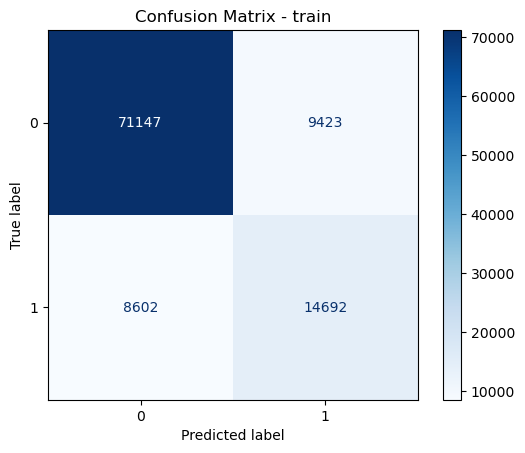

[[0.35745381 0.64254619]
 [0.74647166 0.25352834]
 [0.72896083 0.27103917]
 ...
 [0.9832211  0.0167789 ]
 [0.9561442  0.0438558 ]
 [0.91949147 0.08050853]]


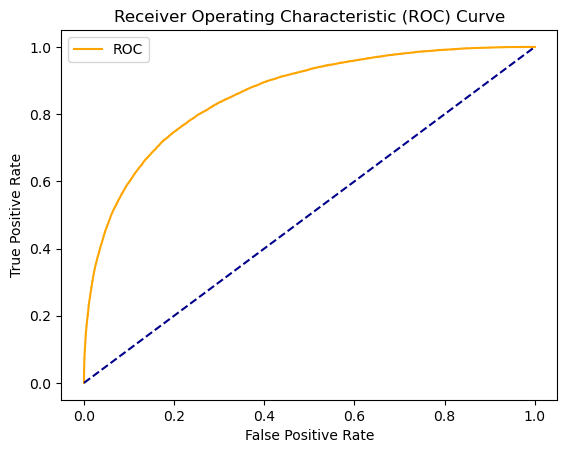

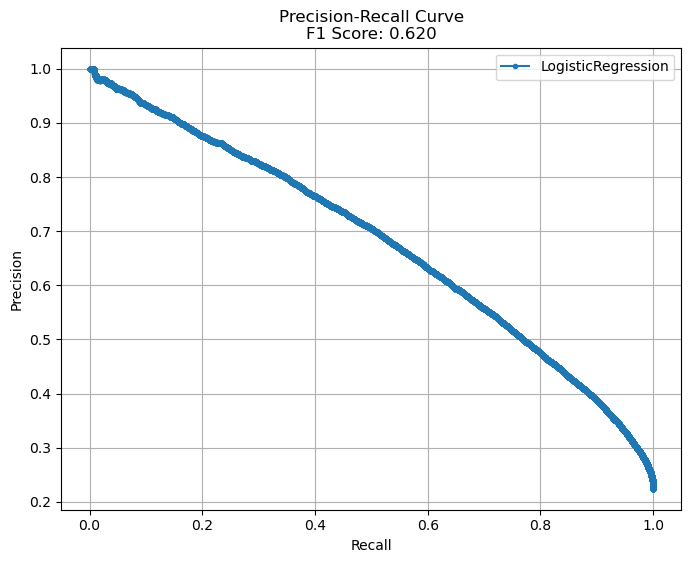

---------------------------------------
test
  Accuracy = 0.8179505813953488
  F1 Score = 0.5925283305319091
  ROC Area under Curve = 0.7391258446323218
  Cohen's Kappa = 0.4753316622108136
              precision    recall  f1-score   support

         0.0    0.88496   0.88064   0.88279     32137
         1.0    0.58753   0.59762   0.59253      9143

    accuracy                        0.81795     41280
   macro avg    0.73624   0.73913   0.73766     41280
weighted avg    0.81908   0.81795   0.81850     41280



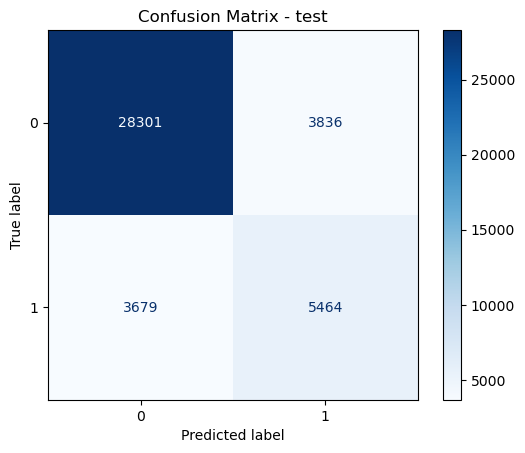

[[0.87051296 0.12948704]
 [0.87536293 0.12463707]
 [0.84897716 0.15102284]
 ...
 [0.79674769 0.20325231]
 [0.8452846  0.1547154 ]
 [0.79579562 0.20420438]]


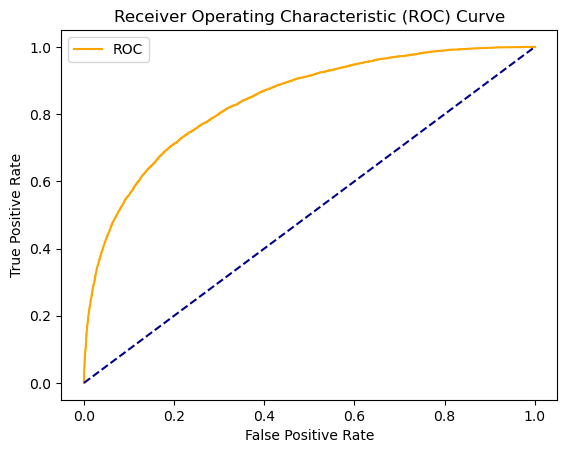

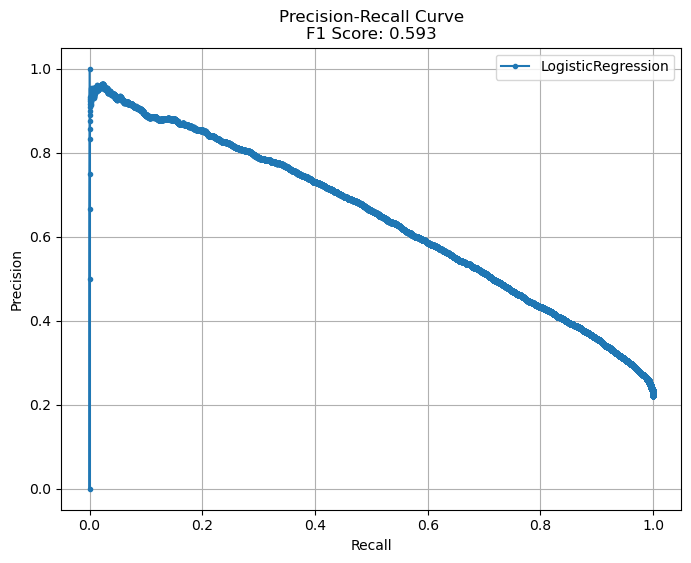

                 Feature  Importance
49    Location_Newcastle    4.340953
71  Location_Witchcliffe    4.307815
61   Location_SalmonGums    4.127290
48  Location_MountGinini    3.937638
55      Location_Penrith    3.932006
..                   ...         ...
9                Temp9am   -0.043407
13       Evaporation_log    0.037717
10               Temp3pm   -0.019643
7               Cloud9am   -0.014493
20         WindDir9am_Dy    0.006830

[74 rows x 2 columns]


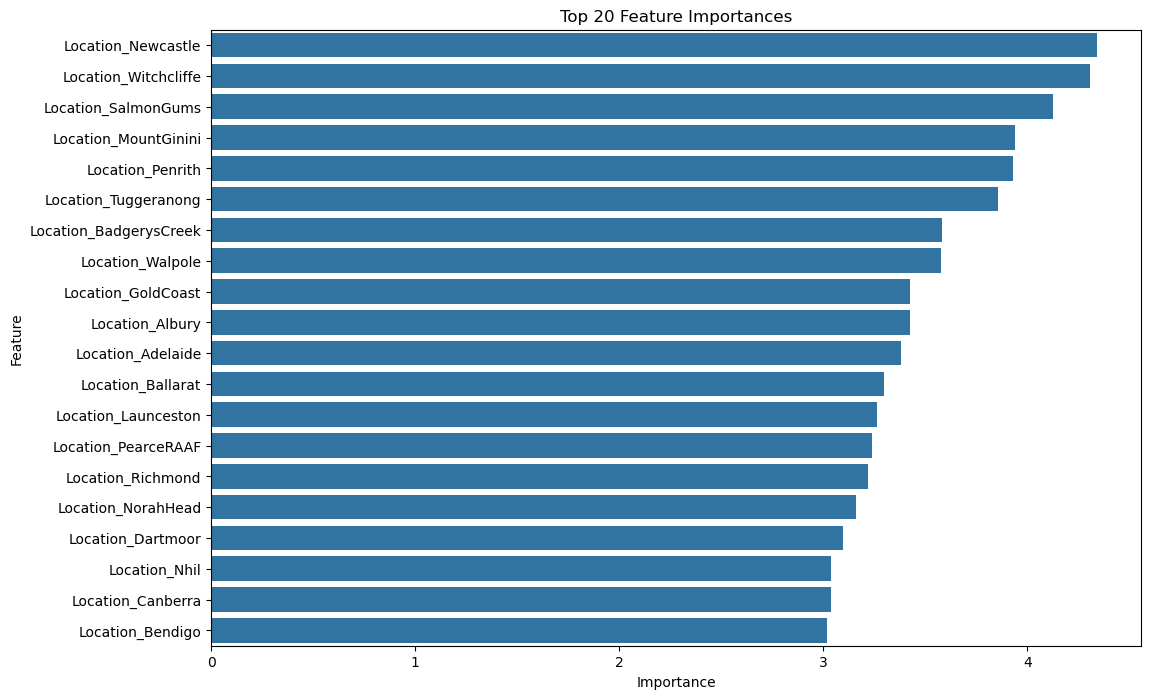

In [95]:
run_pipleline_GridSearchCV(
    grid_serach_lr2,#change
    columnsWithoutList(x_train,col_set_feature_engineering), 
    y_train, 
    columnsWithoutList(x_test,col_set_feature_engineering), 
    y_test)

In [ ]:
grid_serach_lr2.fit(columnsWithoutList(x_train,col_set_feature_engineering), y_train)
best_params_lr2 = grid_serach_lr2.best_params_
print("Best parameters for Logistic Regression: ", best_params_lr2)
print("Best F1 Score:", grid_serach_lr2.best_score_)

In [ ]:
model1_best_lr2 = grid_serach_lr2.best_estimator_
model1_best_lr2.fit(columnsWithoutList(x_train,col_set_feature_engineering), y_train)

Pipeline(steps=[('adasyn', ADASYN(n_neighbors=2, random_state=42)),
                ('scaler', RobustScaler()),
                ('classifier', LogisticRegression(C=0.05))])

---------------------------------------
train
  Accuracy = 0.8242509435415544
  F1 Score = 0.6204673985362608
  ROC Area under Curve = 0.5062631334319193
  Cohen's Kappa = 0.5062631334319193
              precision    recall  f1-score   support

         0.0    0.89410   0.87736   0.88565     80570
         1.0    0.60160   0.64055   0.62047     23294

    accuracy                        0.82425    103864
   macro avg    0.74785   0.75896   0.75306    103864
weighted avg    0.82850   0.82425   0.82618    103864



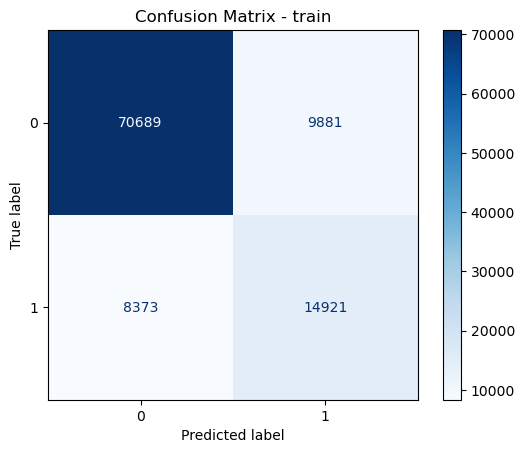

[[0.33936345 0.66063655]
 [0.73344474 0.26655526]
 [0.71200608 0.28799392]
 ...
 [0.98164771 0.01835229]
 [0.95307055 0.04692945]
 [0.91601965 0.08398035]]


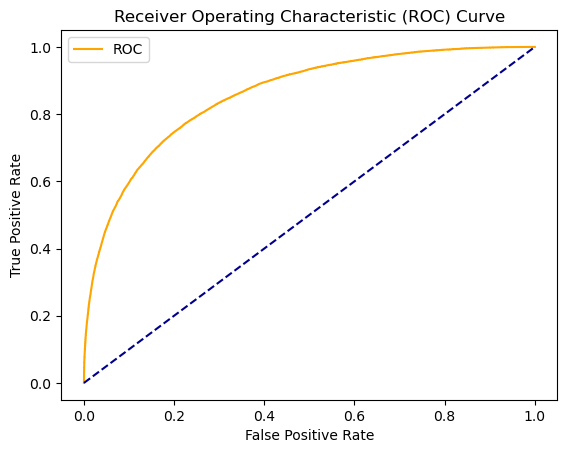

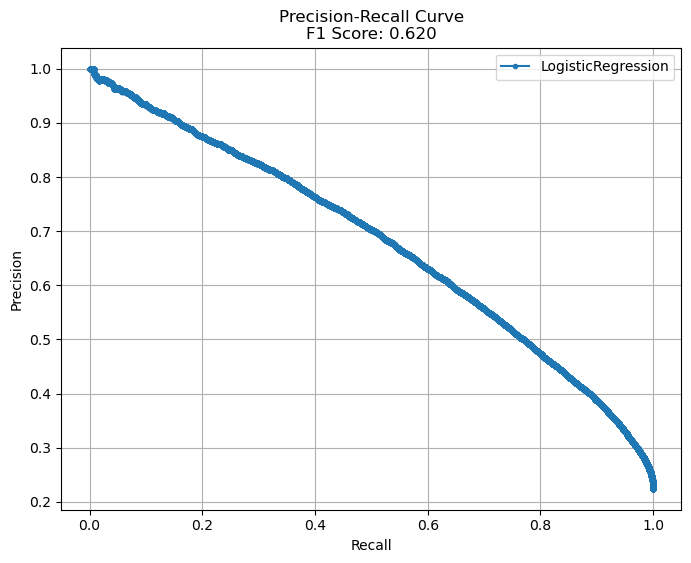

(0.8242509435415544,
 0.7589562578187041,
 0.5062631334319193,
 0.6204673985362608,
 array([0.22427405, 0.22427621, 0.22427837, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        8.58590195e-05, 4.29295097e-05, 0.00000000e+00]))

In [ ]:
run_score_1(model1_best_lr2, 'train', columnsWithoutList(x_train,col_set_feature_engineering), y_train,True)

---------------------------------------
test
  Accuracy = 0.8156492248062015
  F1 Score = 0.593048128342246
  ROC Area under Curve = 0.4739567015054562
  Cohen's Kappa = 0.4739567015054562
              precision    recall  f1-score   support

         0.0    0.88658   0.87516   0.88083     32137
         1.0    0.58020   0.60647   0.59305      9143

    accuracy                        0.81565     41280
   macro avg    0.73339   0.74082   0.73694     41280
weighted avg    0.81872   0.81565   0.81709     41280



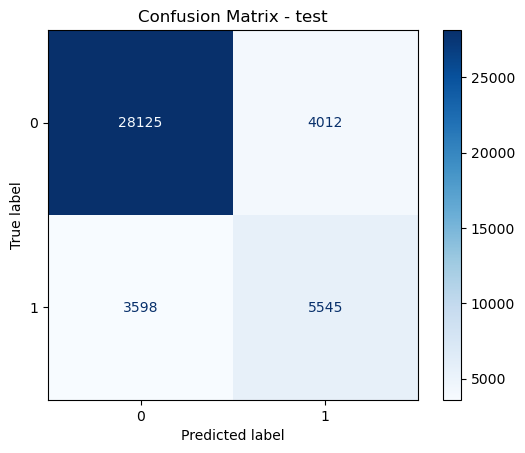

[[0.85867097 0.14132903]
 [0.86505331 0.13494669]
 [0.83806832 0.16193168]
 ...
 [0.78490758 0.21509242]
 [0.83310489 0.16689511]
 [0.78117123 0.21882877]]


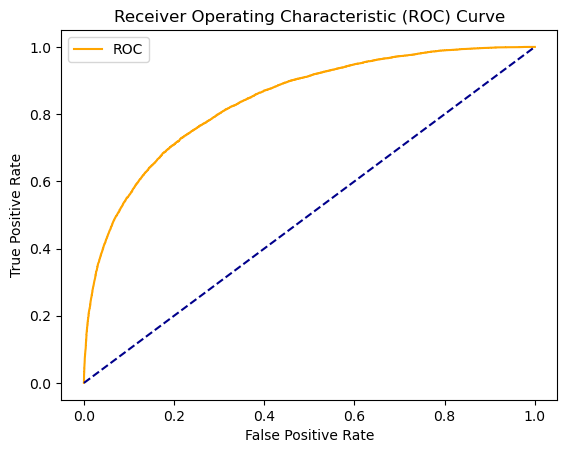

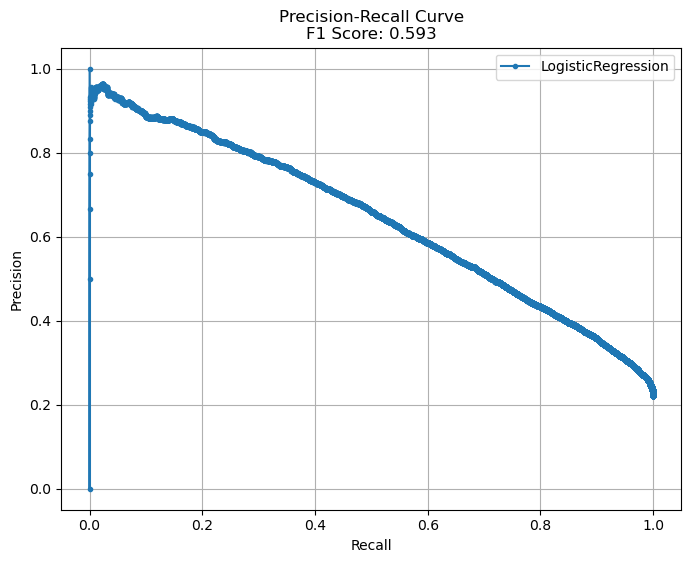

(0.8156492248062015,
 0.7408171861668833,
 0.4739567015054562,
 0.593048128342246,
 array([0.2214874 , 0.22149277, 0.22149813, ..., 0.5       , 0.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.09373291e-04, 0.00000000e+00, 0.00000000e+00]))

In [ ]:
run_score_1(model1_best_lr2, 'test', columnsWithoutList(x_test,col_set_feature_engineering), y_test,True)

                 Feature  Importance
49    Location_Newcastle    4.312662
71  Location_Witchcliffe    4.300597
61   Location_SalmonGums    4.121324
48  Location_MountGinini    3.965934
55      Location_Penrith    3.904361
..                   ...         ...
18        WindGustDir_Dy   -0.053619
13       Evaporation_log    0.049603
10               Temp3pm    0.041047
7               Cloud9am   -0.015495
20         WindDir9am_Dy    0.007313

[74 rows x 2 columns]


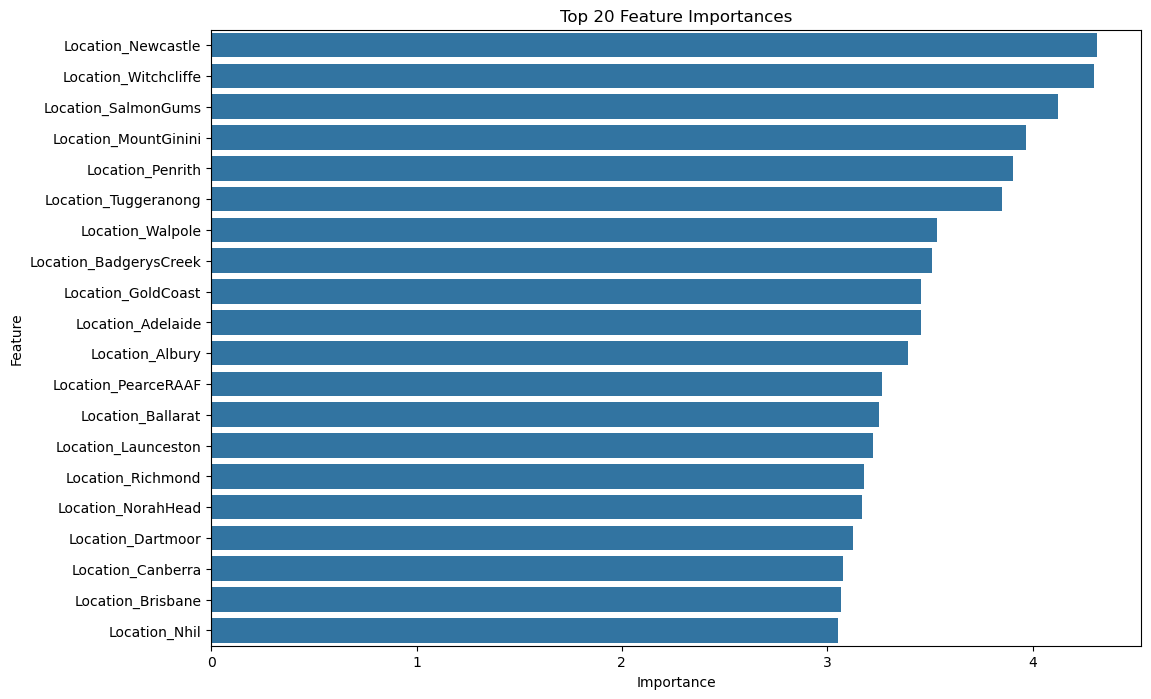

,Feature,Importance
49,Location_Newcastle,4.312662
71,Location_Witchcliffe,4.300597
61,Location_SalmonGums,4.121324
48,Location_MountGinini,3.965934
55,Location_Penrith,3.904361
...,...,...
18,WindGustDir_Dy,-0.053619
13,Evaporation_log,0.049603
10,Temp3pm,0.041047
7,Cloud9am,-0.015495


In [ ]:
get_feature_importance(model1_best_lr2,columnsWithoutList(x_test,col_set_feature_engineering).columns)

## Model-2: K-nearest neighbors (KNN)


「uniform」：所有鄰居都做出同等貢獻，當本地鄰居平衡時，這種方法很有效。
「distance」：較近的鄰居具有更大的影響力，這通常對於不平衡的資料集更好，或者當來自 ADASYN 的合成樣本在決策邊界附近創建密集的少數類區域時更好。



'euclidean' ：標準 L2 距離，適用於連續、縮放良好的特性。
'manhattan' ：L1 距離，對異常值具有穩健性，並且對高維或稀疏資料有效。
“chebyshev” ：沿著任意維度的最大距離，對於特定情況有用，但不太常見。



In [ ]:
model_knn2 = KNeighborsClassifier()
pipleline_knn2 = Pipeline([
        ('adasyn', ADASYN_Object),
        ('scaler', scaler),
        ('classifier', model_knn2)
    ])
param_grid_pipline_knn2 = {
    
    'adasyn__n_neighbors':np.where((arr := np.geomspace(601, max(y_train.value_counts())*2, num=5, dtype=int)) % 2 == 0, arr + 1, arr),
    'classifier__n_neighbors': [61],  # np.where((arr := np.geomspace(3, max(y_train.value_counts())*2, num=5, dtype=int)) % 2 == 0, arr + 1, arr)
    'classifier__weights': ['distance'],  # 'uniform', 'distance'
    'classifier__metric': ['manhattan'],  # 'euclidean', 'manhattan', 'chebyshev'
    # 'classifier__p': [1, 2],  # For Minkowski metric
    # 'classifier__leaf_size': [20, 30, 40],  # For tree-based algorithms
    # 'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree']  # Neighbor search algorithm
}
print(param_grid_pipline_knn2)
gridserachcv_knn2 = GridSearchCV(estimator=pipleline_knn2, 
                                param_grid=param_grid_pipline_knn2, 
                                cv=tscv, 
                                scoring='f1', 
                                )

In [98]:
print(param_grid_pipline_knn2)

{'adasyn__n_neighbors': array([   601,   2431,   9841,  39821, 161141]), 'classifier__n_neighbors': [61], 'classifier__weights': ['uniform'], 'classifier__metric': ['manhattan']}


In [72]:
# model1_best = gridserachcv_knn2.best_estimator_
# model1_best = model1_best[1:] # remove the pipeline adasyn
# # model1_best.fit(columnsWithoutList(x_train,col_set_feature_engineering), y_train)
# run_score_1(model1_best, 'train', columnsWithoutList(x_train,col_set_dummies), y_train,True)
# run_score_1(model1_best, 'test', columnsWithoutList(x_test,col_set_dummies), y_test,True)
# get_feature_importance(model1_best,columnsWithoutList(x_test,col_set_dummies).columns)

In [83]:
columnsWithoutList(x_train,col_set_dummies)

,MinTemp,MaxTemp,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,...,WindGustDir_Dx,WindGustDir_Dy,WindDir9am_Dx,WindDir9am_Dy,WindDir3pm_Dx,WindDir3pm_Dy,Sunshine_missingFlag,Evaporation_log_missingFlag,lat,lng
0,8.8,15.7,2.6,92.0,67.0,1017.4,1017.7,7.0,1.0,13.5,...,3.394113e+01,-3.394113e+01,-9.192388,-9.192388,-2.755455e-15,-1.500000e+01,0,0,-34.9275,138.6
1,12.7,15.8,7.8,75.0,52.0,1022.4,1022.6,7.0,1.0,13.7,...,-2.474874e+01,-2.474874e+01,-12.010434,-4.974885,-1.060660e+01,-1.060660e+01,0,0,-34.9275,138.6
2,6.2,15.1,2.1,81.0,56.0,1027.8,1026.5,7.0,1.0,9.3,...,-3.673940e-15,-2.000000e+01,1.847759,0.765367,-7.778175e+00,-7.778175e+00,0,0,-34.9275,138.6
3,5.3,15.9,8.0,71.0,46.0,1028.7,1025.6,7.0,1.0,10.2,...,2.771639e+01,1.148050e+01,5.543277,2.296101,9.192388e+00,9.192388e+00,0,0,-34.9275,138.6
4,11.3,15.7,1.5,62.0,62.0,1019.5,1016.2,7.0,1.0,13.0,...,4.804174e+01,-1.989954e+01,13.858193,5.740251,2.032535e+01,-8.419036e+00,0,0,-34.9275,138.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103859,15.5,32.0,11.0,50.0,20.0,1016.9,1014.7,1.0,0.0,17.6,...,-5.200000e+01,6.368163e-15,-22.173109,9.184402,-3.100000e+01,3.796405e-15,0,0,-31.1496,136.8
103860,15.1,33.8,12.4,50.0,12.0,1014.7,1011.5,0.0,0.0,19.5,...,-3.787906e+01,1.569002e+01,-22.173109,9.184402,-9.192388e+00,-9.192388e+00,0,0,-31.1496,136.8
103861,17.5,36.5,12.4,37.0,6.0,1011.3,1008.5,1.0,0.0,23.1,...,-3.603130e+01,1.492465e+01,-14.142136,14.142136,-1.847759e+01,7.653669e+00,0,0,-31.1496,136.8
103862,21.2,38.1,12.4,19.0,11.0,1009.3,1006.2,1.0,0.0,27.9,...,4.100000e+01,0.000000e+00,7.270985,17.553711,2.000000e+01,0.000000e+00,0,0,-31.1496,136.8


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
12 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y, 

Best parameters for Logistic Regression:  {'adasyn__n_neighbors': 2431, 'classifier__metric': 'manhattan', 'classifier__n_neighbors': 61, 'classifier__weights': 'uniform'}
Best F1 Score: 0.5893080480884834
---------------------------------------
train
  Accuracy = 0.8306150350458291
  F1 Score = 0.6551811998980812
  ROC Area under Curve = 0.7904176160542578
  Cohen's Kappa = 0.5440350584203716
              precision    recall  f1-score   support

         0.0    0.91358   0.86331   0.88773     80570
         1.0    0.60281   0.71752   0.65518     23294

    accuracy                        0.83062    103864
   macro avg    0.75819   0.79042   0.77146    103864
weighted avg    0.84388   0.83062   0.83558    103864



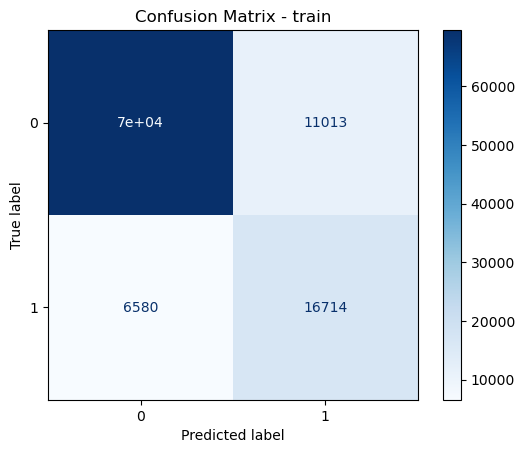

[[0.14754098 0.85245902]
 [0.62295082 0.37704918]
 [0.81967213 0.18032787]
 ...
 [0.98360656 0.01639344]
 [0.96721311 0.03278689]
 [0.95081967 0.04918033]]


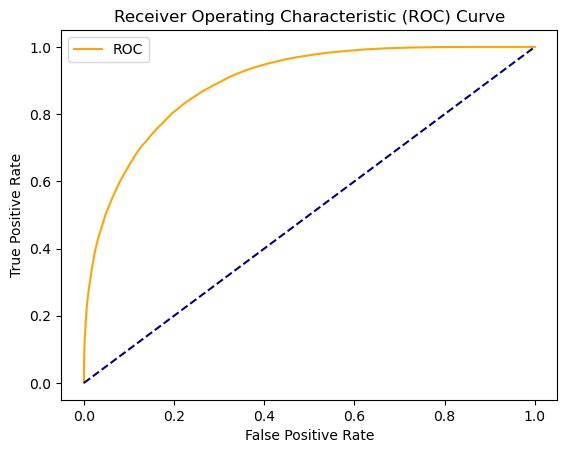

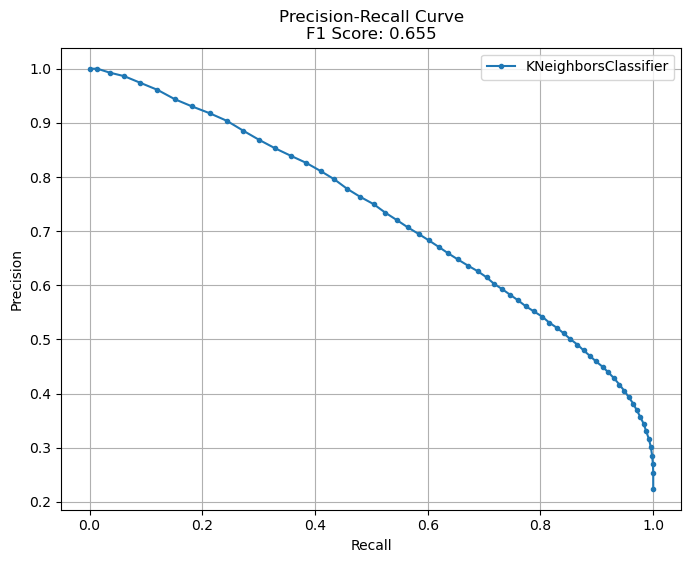

---------------------------------------
test
  Accuracy = 0.8090600775193798
  F1 Score = 0.6036806114239742
  ROC Area under Curve = 0.7545060446483235
  Cohen's Kappa = 0.4789874938183911
              precision    recall  f1-score   support

         0.0    0.89717   0.85244   0.87423     32137
         1.0    0.55868   0.65657   0.60368      9143

    accuracy                        0.80906     41280
   macro avg    0.72792   0.75451   0.73896     41280
weighted avg    0.82220   0.80906   0.81431     41280



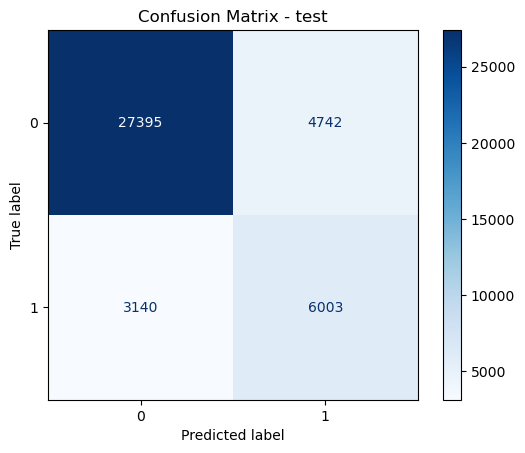

[[0.96721311 0.03278689]
 [0.96721311 0.03278689]
 [0.96721311 0.03278689]
 ...
 [0.50819672 0.49180328]
 [0.40983607 0.59016393]
 [0.63934426 0.36065574]]


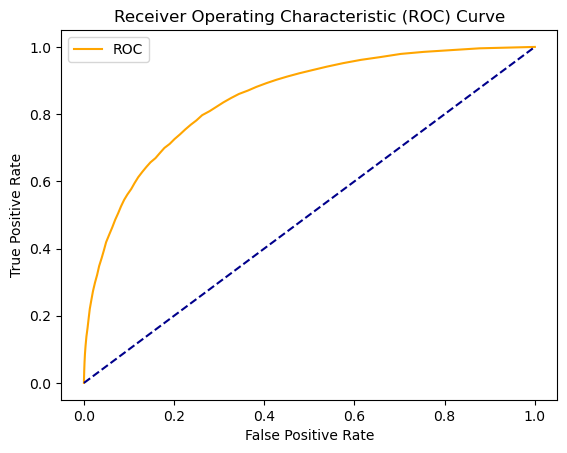

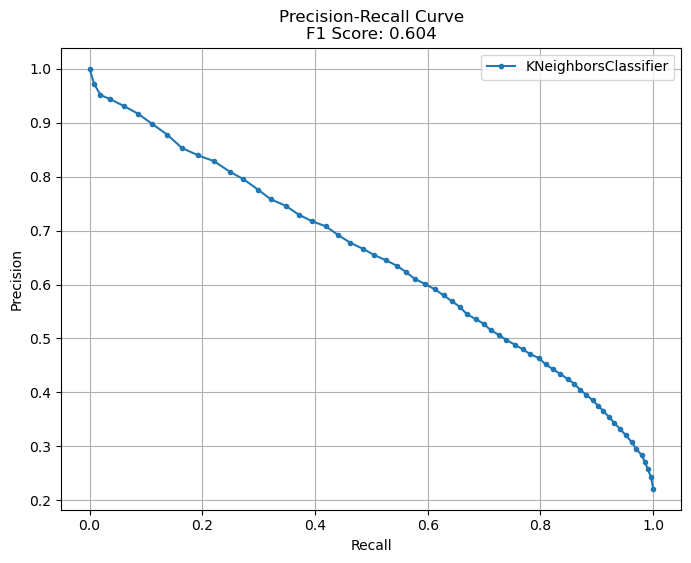

In [92]:
run_pipleline_GridSearchCV(
    gridserachcv_knn2,#change
    columnsWithoutList(x_train,col_set_dummies), 
    y_train, 
    columnsWithoutList(x_test,col_set_dummies), 
    y_test)

## Model-3: Decision Tree

In [99]:
%run Project_3_Step_4_0_ML_Score_Method.ipynb

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
model_dtc = DecisionTreeClassifier()



pipleline_dtc = Pipeline([
        ('adasyn', ADASYN_Object),
        ('scaler', scaler),
        ('classifier', model_dtc)
    ])
param_grid_pipline_dtc = {
    
    'adasyn__n_neighbors':[3000],
    'classifier__max_depth': [5], # None, 3,5,7
    # 'classifier__min_samples_split': [2],
    'classifier__criterion': ['gini'], #'gini','entropy'
}
print(param_grid_pipline_dtc)
gridserachcv_dtc = GridSearchCV(estimator=pipleline_dtc, 
                                param_grid=param_grid_pipline_dtc, 
                                cv=tscv, 
                                scoring='f1', 
                                verbose=3
                                )

{'adasyn__n_neighbors': [2000, 3000, 3500], 'classifier__max_depth': [5], 'classifier__criterion': ['gini']}


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END adasyn__n_neighbors=2000, classifier__criterion=gini, classifier__max_depth=5;, score=0.549 total time=   1.2s
[CV 2/5] END adasyn__n_neighbors=2000, classifier__criterion=gini, classifier__max_depth=5;, score=0.547 total time=   3.0s
[CV 3/5] END adasyn__n_neighbors=2000, classifier__criterion=gini, classifier__max_depth=5;, score=0.578 total time=   5.6s
[CV 4/5] END adasyn__n_neighbors=2000, classifier__criterion=gini, classifier__max_depth=5;, score=0.569 total time=   9.2s
[CV 5/5] END adasyn__n_neighbors=2000, classifier__criterion=gini, classifier__max_depth=5;, score=0.547 total time=   7.3s
[CV 1/5] END adasyn__n_neighbors=3000, classifier__criterion=gini, classifier__max_depth=5;, score=0.573 total time=   1.4s
[CV 2/5] END adasyn__n_neighbors=3000, classifier__criterion=gini, classifier__max_depth=5;, score=0.551 total time=   4.0s
[CV 3/5] END adasyn__n_neighbors=3000, classifier__criterion=gini, class

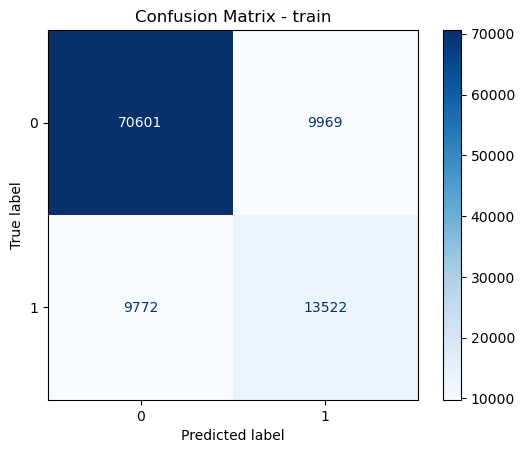

[[0.35001834 0.64998166]
 [0.84283276 0.15716724]
 [0.74891873 0.25108127]
 ...
 [0.9159537  0.0840463 ]
 [0.9159537  0.0840463 ]
 [0.9159537  0.0840463 ]]


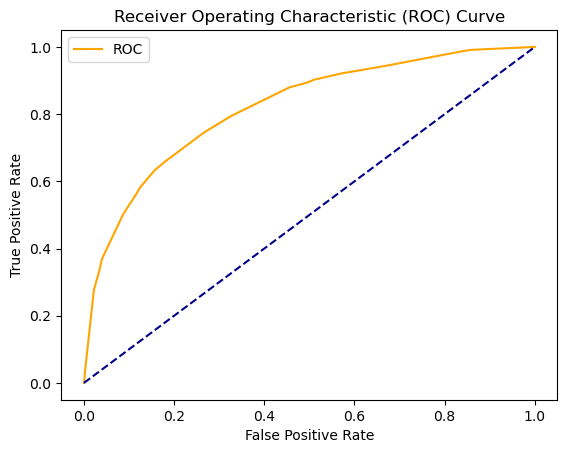

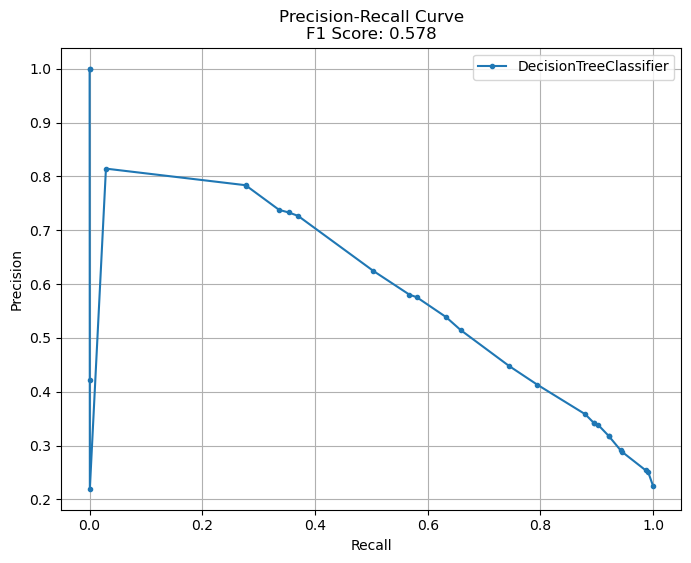

---------------------------------------
test
  Accuracy = 0.8010416666666667
  F1 Score = 0.5506374131422006
  ROC Area under Curve = 0.7113626818569198
  Cohen's Kappa = 0.42287428070758326
              precision    recall  f1-score   support

         0.0    0.87211   0.87236   0.87224     32137
         1.0    0.55091   0.55037   0.55064      9143

    accuracy                        0.80104     41280
   macro avg    0.71151   0.71136   0.71144     41280
weighted avg    0.80097   0.80104   0.80101     41280



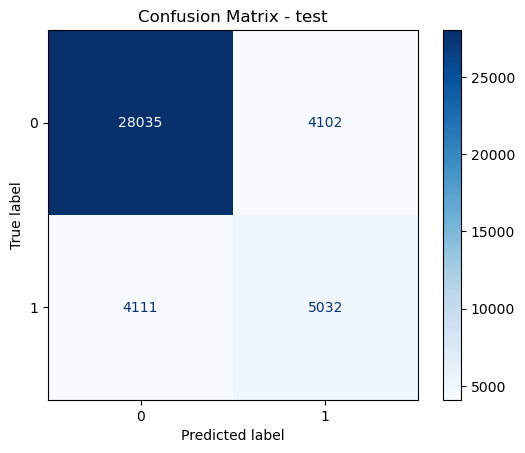

[[0.74891873 0.25108127]
 [0.74891873 0.25108127]
 [0.74891873 0.25108127]
 ...
 [0.68207941 0.31792059]
 [0.68207941 0.31792059]
 [0.68207941 0.31792059]]


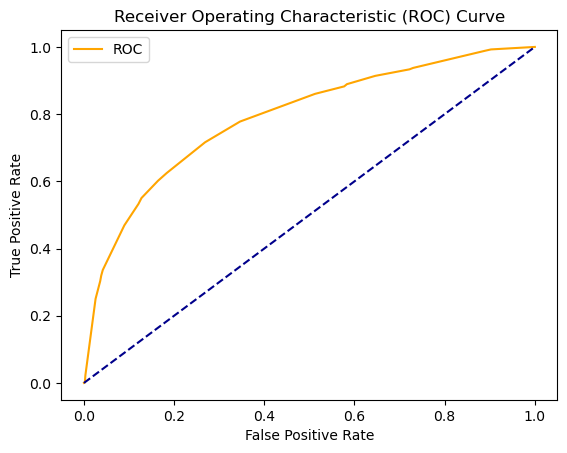

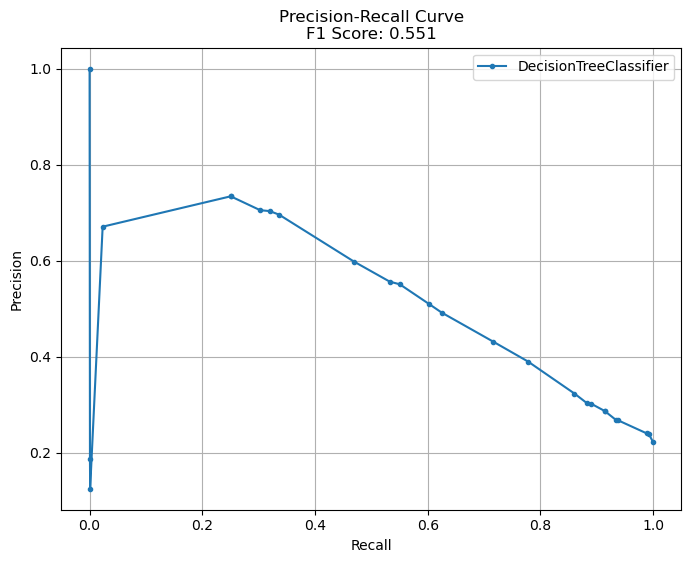

                        Feature  Importance
12                 Rainfall_log    0.535143
4                   Humidity3pm    0.204918
11                    RainToday    0.162214
8                      Cloud3pm    0.035056
6                   Pressure3pm    0.028152
2                      Sunshine    0.027539
23         Sunshine_missingFlag    0.004381
3                   Humidity9am    0.001126
10                      Temp3pm    0.000860
7                      Cloud9am    0.000329
9                       Temp9am    0.000110
25                          lat    0.000102
15                 DayOfYear_Dx    0.000068
21                WindDir3pm_Dx    0.000000
22                WindDir3pm_Dy    0.000000
0                       MinTemp    0.000000
24  Evaporation_log_missingFlag    0.000000
19                WindDir9am_Dx    0.000000
20                WindDir9am_Dy    0.000000
13              Evaporation_log    0.000000
18               WindGustDir_Dy    0.000000
17               WindGustDir_Dx 

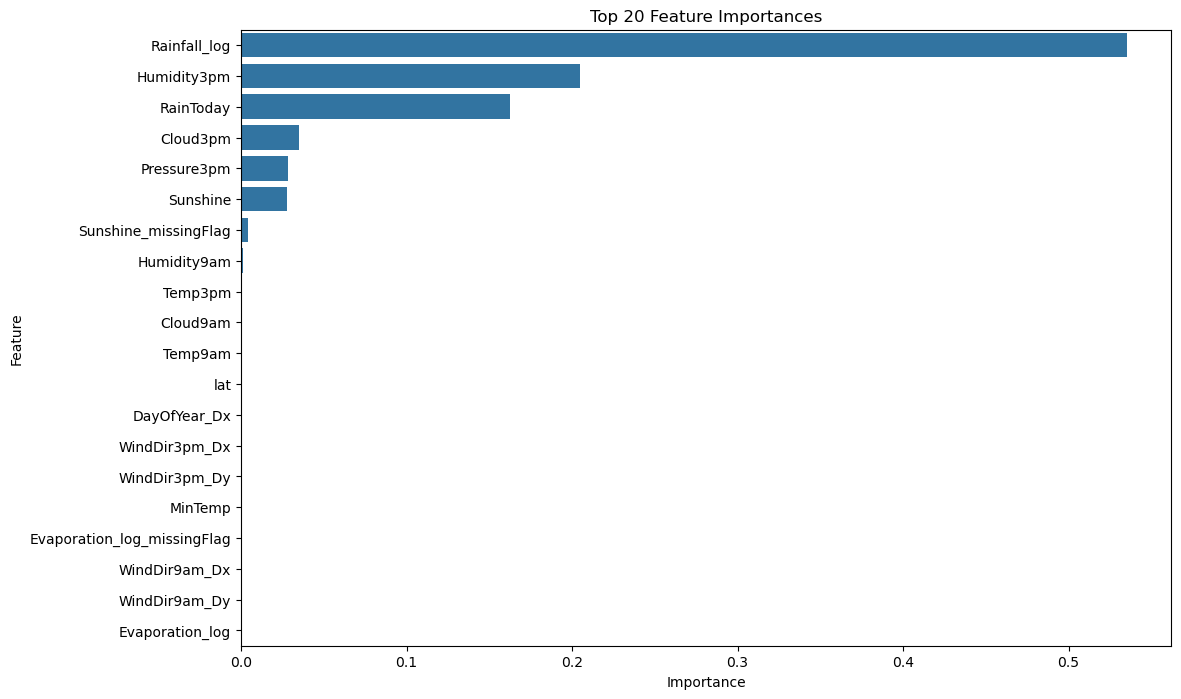

In [25]:
run_pipleline_GridSearchCV(
    gridserachcv_dtc,#change
    columnsWithoutList(x_train,col_set_dummies), 
    y_train, 
    columnsWithoutList(x_test,col_set_dummies), 
    y_test)

## Model-4: Random Forest

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
model_rfc_forgridsearch = RandomForestClassifier()

pipleline_rfc = Pipeline([
        ('adasyn', ADASYN_Object),
        ('scaler', scaler),
        ('classifier', model_rfc_forgridsearch)
    ])
param_grid_pipline_rfc = {
    
    'adasyn__n_neighbors':[2500],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_features': ['sqrt'],
    'classifier__max_depth': [5, 10]
}
print(param_grid_pipline_rfc)
gridserachcv_rfc = GridSearchCV(estimator=pipleline_rfc, 
                                param_grid=param_grid_pipline_rfc, 
                                cv=tscv, 
                                scoring='f1', 
                                )
random_search_dtc = RandomizedSearchCV(
    estimator=pipleline_rfc,
    param_distributions=param_grid_pipline_rfc,
    n_iter=10,          # 你可以根據需求調整隨機抽樣的次數
    cv=tscv,
    scoring='f1',
    verbose=3,
    random_state=42    # 固定隨機種子，方便結果重現
)

{'adasyn__n_neighbors': [2500], 'classifier__n_estimators': [50, 100, 200], 'classifier__max_features': ['sqrt'], 'classifier__max_depth': [5, 10]}


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END adasyn__n_neighbors=2500, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=50;, score=0.608 total time=   2.2s
[CV 2/5] END adasyn__n_neighbors=2500, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=50;, score=0.557 total time=   5.1s
[CV 3/5] END adasyn__n_neighbors=2500, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=50;, score=0.589 total time=   8.8s
[CV 4/5] END adasyn__n_neighbors=2500, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=50;, score=0.583 total time=  13.5s
[CV 5/5] END adasyn__n_neighbors=2500, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=50;, score=0.552 total time=  13.4s
[CV 1/5] END adasyn__n_neighbors=2500, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=100;, score=0.609 total time=   3.2s
[CV

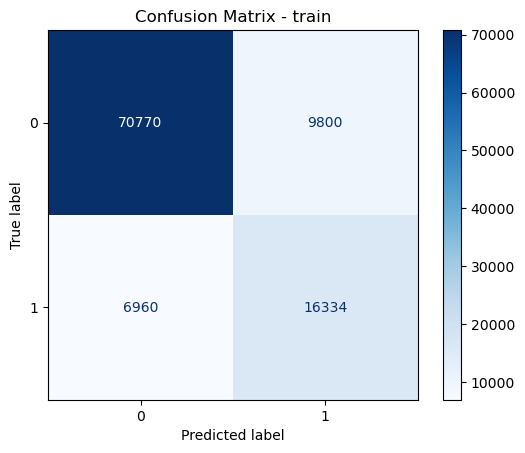

[[0.25372974 0.74627026]
 [0.75872404 0.24127596]
 [0.86836925 0.13163075]
 ...
 [0.98889538 0.01110462]
 [0.96754027 0.03245973]
 [0.96245212 0.03754788]]


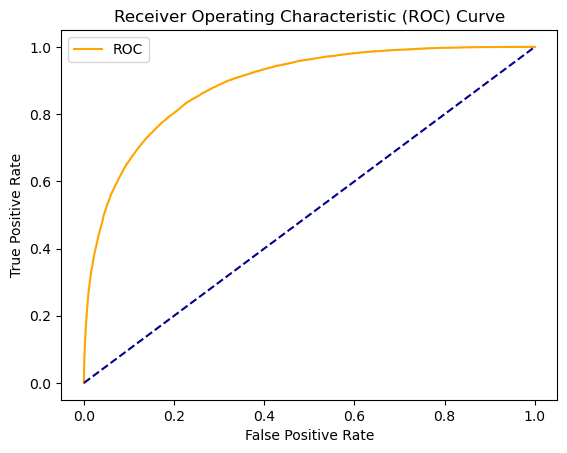

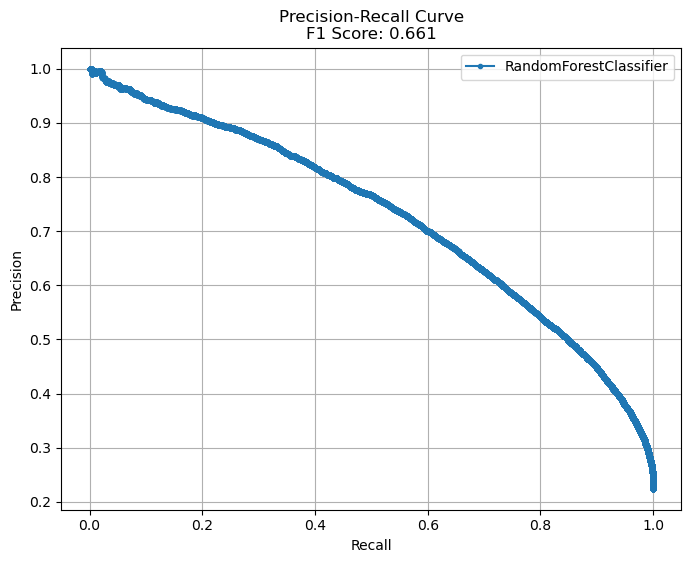

---------------------------------------
test
  Accuracy = 0.8131540697674419
  F1 Score = 0.6007970601935717
  ROC Area under Curve = 0.7493488899451585
  Cohen's Kappa = 0.4792877090421156
              precision    recall  f1-score   support

         0.0    0.89264   0.86390   0.87803     32137
         1.0    0.57025   0.63480   0.60080      9143

    accuracy                        0.81315     41280
   macro avg    0.73145   0.74935   0.73942     41280
weighted avg    0.82124   0.81315   0.81663     41280



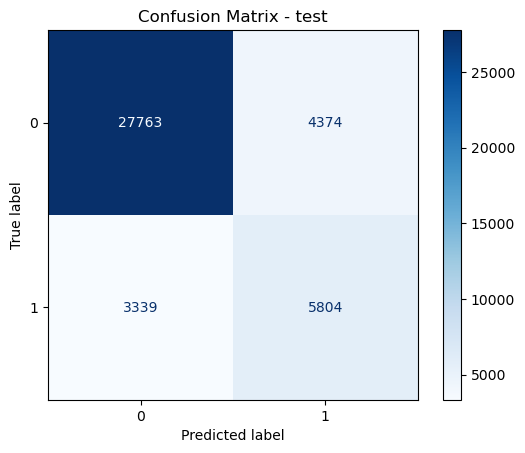

[[0.88358489 0.11641511]
 [0.84462423 0.15537577]
 [0.8949427  0.1050573 ]
 ...
 [0.75690847 0.24309153]
 [0.60296042 0.39703958]
 [0.74833418 0.25166582]]


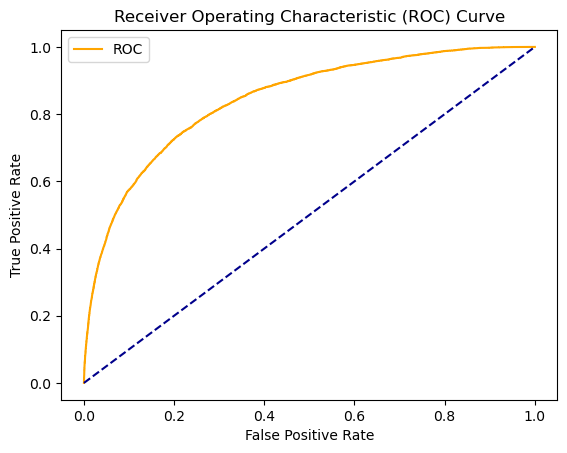

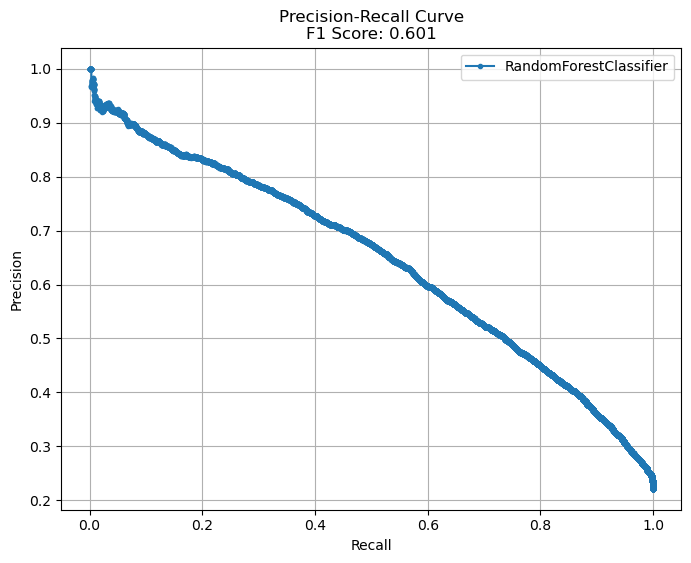

                        Feature  Importance
4                   Humidity3pm    0.189598
11                    RainToday    0.184054
12                 Rainfall_log    0.160790
2                      Sunshine    0.091721
8                      Cloud3pm    0.071617
7                      Cloud9am    0.053793
6                   Pressure3pm    0.037393
5                   Pressure9am    0.028823
3                   Humidity9am    0.027509
23         Sunshine_missingFlag    0.021619
25                          lat    0.019205
26                          lng    0.014298
19                WindDir9am_Dx    0.012093
13              Evaporation_log    0.011609
21                WindDir3pm_Dx    0.011409
24  Evaporation_log_missingFlag    0.009465
17               WindGustDir_Dx    0.008792
10                      Temp3pm    0.008756
0                       MinTemp    0.005830
1                       MaxTemp    0.004866
18               WindGustDir_Dy    0.004625
20                WindDir9am_Dy 

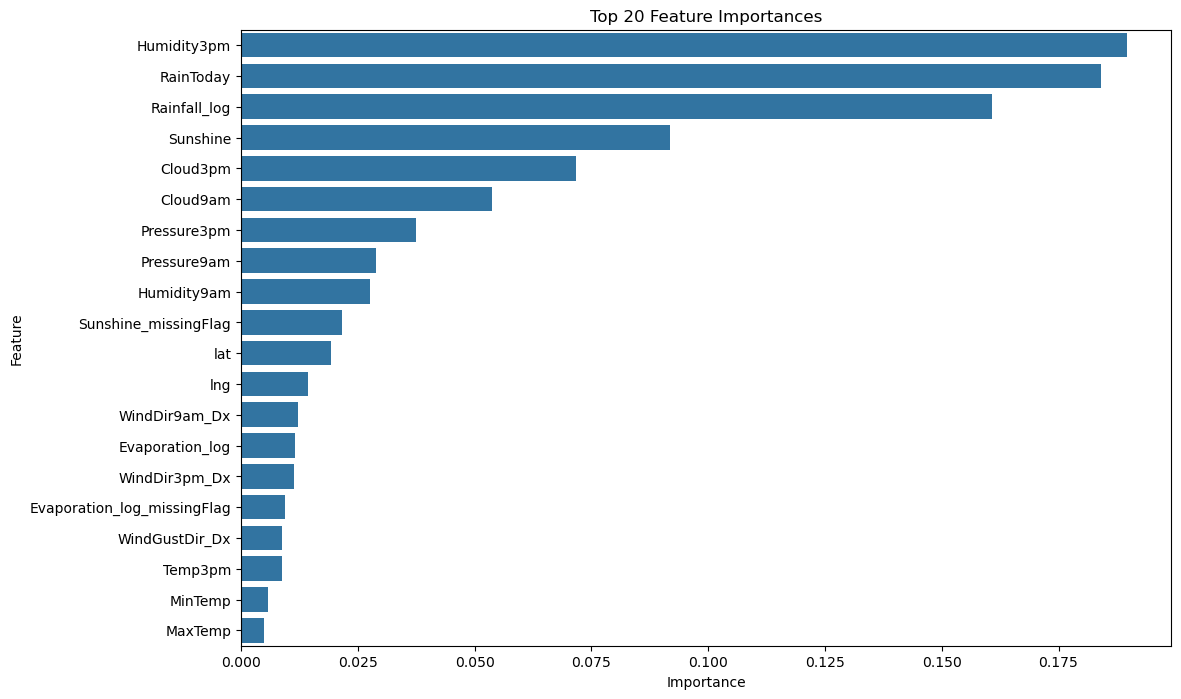

In [42]:
run_pipleline_GridSearchCV(
    random_search_dtc,#change
    columnsWithoutList(x_train,col_set_dummies), 
    y_train, 
    columnsWithoutList(x_test,col_set_dummies), 
    y_test)

# Cat Boost

In [36]:
import catboost as cb
from scipy.stats import randint, uniform

In [38]:
model_cb_forgridsearchcv = cb.CatBoostClassifier(random_state=42)


pipleline_cb = Pipeline([
        ('adasyn', ADASYN_Object),
        ('scaler', scaler),
        ('classifier', model_cb_forgridsearchcv)
    ])

param_grid_pipline_cb = {
    'adasyn__n_neighbors':[2500],
    'classifier__learning_rate': uniform(0.01, 0.29),       # 0.01 ~ 0.3
    'classifier__depth': randint(4, 11),                    # 4 ~ 10
    'classifier__l2_leaf_reg': randint(1, 11),              # 1 ~ 10
    'classifier__random_strength': uniform(0, 20),          # 0 ~ 20
    'classifier__iterations': randint(100, 1000)             # 100 ~ 1000 (可視需求調整)
}
print(param_grid_pipline_cb)



random_search_cb = RandomizedSearchCV(
    estimator=pipleline_cb,
    param_distributions=param_grid_pipline_cb,
    n_iter=10,
    cv=tscv,
    scoring='f1',
    verbose=3,
    n_jobs=-1,
    random_state=42
)


{'adasyn__n_neighbors': [2500], 'classifier__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002649986EA20>, 'classifier__depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002649986FFE0>, 'classifier__l2_leaf_reg': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002649986DFA0>, 'classifier__random_strength': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002649986F740>, 'classifier__iterations': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002649986F200>}


Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 333, in fit
    self._final_estimator.fit(

0:	learn: 0.6813153	total: 189ms	remaining: 1m 44s
1:	learn: 0.6720284	total: 238ms	remaining: 1m 5s
2:	learn: 0.6632699	total: 289ms	remaining: 53.1s
3:	learn: 0.6538676	total: 344ms	remaining: 47.3s
4:	learn: 0.6443825	total: 395ms	remaining: 43.4s
5:	learn: 0.6303177	total: 451ms	remaining: 41.2s
6:	learn: 0.6234501	total: 507ms	remaining: 39.6s
7:	learn: 0.6152049	total: 567ms	remaining: 38.7s
8:	learn: 0.6074440	total: 622ms	remaining: 37.7s
9:	learn: 0.6006115	total: 676ms	remaining: 36.8s
10:	learn: 0.5940304	total: 733ms	remaining: 36.2s
11:	learn: 0.5871931	total: 790ms	remaining: 35.7s
12:	learn: 0.5809838	total: 846ms	remaining: 35.2s
13:	learn: 0.5701800	total: 906ms	remaining: 34.9s
14:	learn: 0.5605577	total: 967ms	remaining: 34.8s
15:	learn: 0.5552419	total: 1.04s	remaining: 34.8s
16:	learn: 0.5489419	total: 1.11s	remaining: 35s
17:	learn: 0.5444850	total: 1.17s	remaining: 34.9s
18:	learn: 0.5374122	total: 1.23s	remaining: 34.6s
19:	learn: 0.5327803	total: 1.29s	remainin

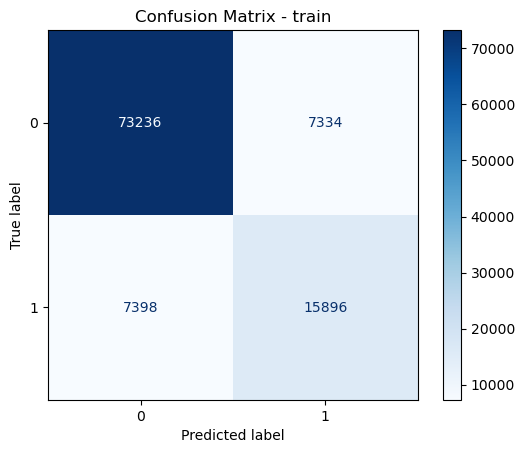

[[0.24997146 0.75002854]
 [0.79984867 0.20015133]
 [0.84979415 0.15020585]
 ...
 [0.99204719 0.00795281]
 [0.95819777 0.04180223]
 [0.93762164 0.06237836]]


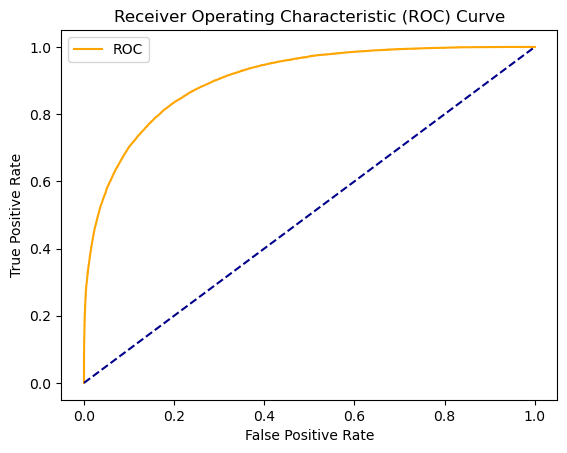

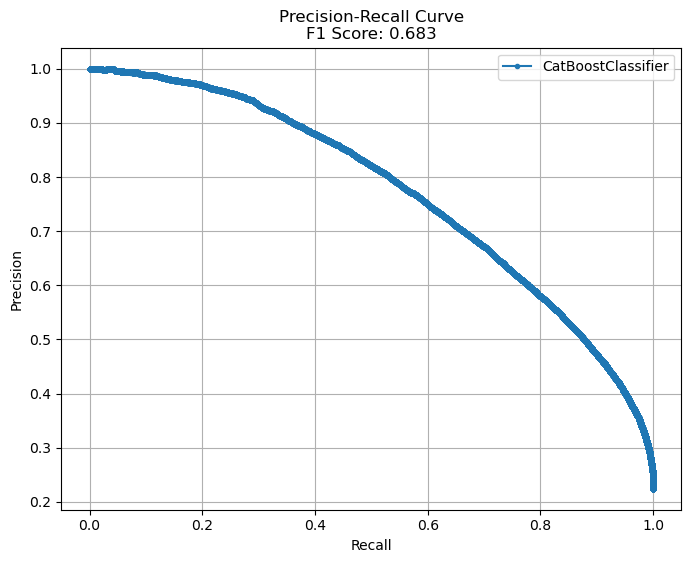

---------------------------------------
test
  Accuracy = 0.8361918604651163
  F1 Score = 0.6218120805369127
  ROC Area under Curve = 0.7545584969979998
  Cohen's Kappa = 0.517335421481685
              precision    recall  f1-score   support

         0.0    0.88987   0.90111   0.89545     32137
         1.0    0.63626   0.60801   0.62181      9143

    accuracy                        0.83619     41280
   macro avg    0.76306   0.75456   0.75863     41280
weighted avg    0.83370   0.83619   0.83485     41280



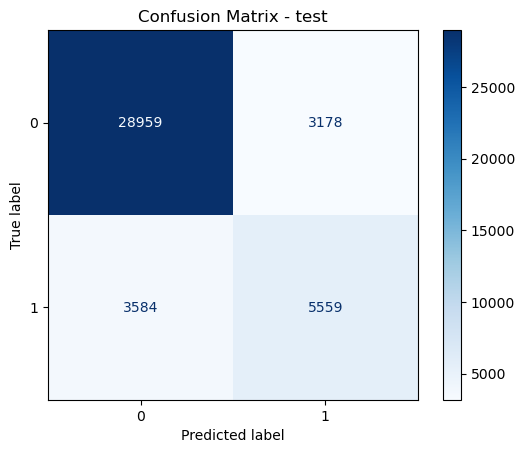

[[0.89194335 0.10805665]
 [0.88155612 0.11844388]
 [0.89162118 0.10837882]
 ...
 [0.76714913 0.23285087]
 [0.62210164 0.37789836]
 [0.80903784 0.19096216]]


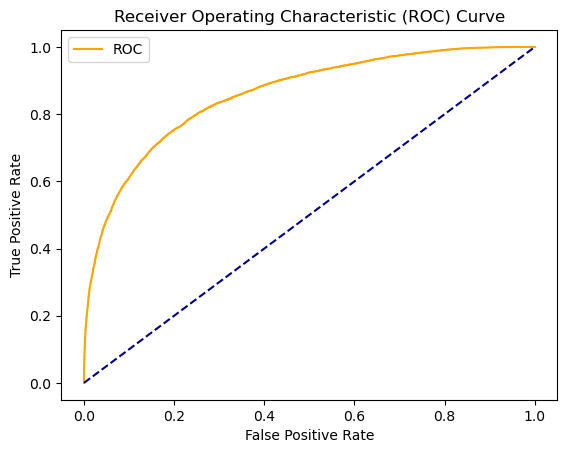

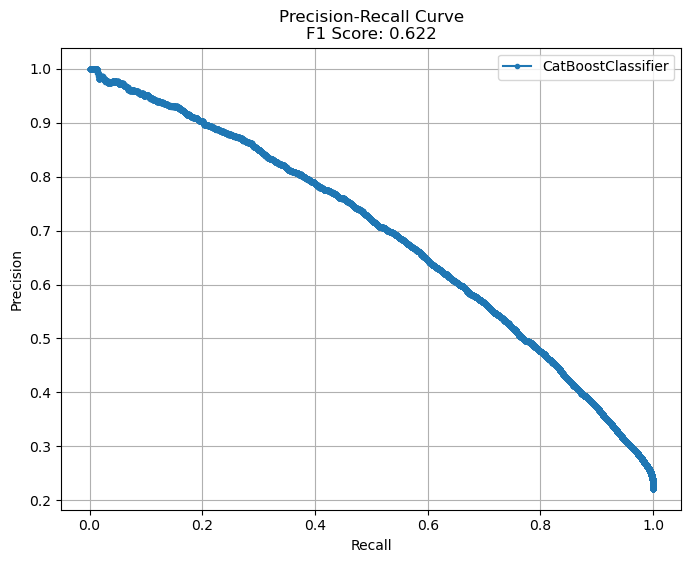

                        Feature  Importance
11                    RainToday   34.358143
7                      Cloud9am   11.846423
8                      Cloud3pm    8.394023
4                   Humidity3pm    6.956258
12                 Rainfall_log    5.874758
2                      Sunshine    3.840409
26                          lng    3.825930
25                          lat    3.193854
6                   Pressure3pm    2.510827
23         Sunshine_missingFlag    1.882212
5                   Pressure9am    1.464237
17               WindGustDir_Dx    1.427441
21                WindDir3pm_Dx    1.403517
19                WindDir9am_Dx    1.260958
13              Evaporation_log    1.210888
18               WindGustDir_Dy    1.206830
24  Evaporation_log_missingFlag    1.048477
16                 DayOfYear_Dy    1.041793
0                       MinTemp    0.988533
22                WindDir3pm_Dy    0.913109
3                   Humidity9am    0.899476
20                WindDir9am_Dy 

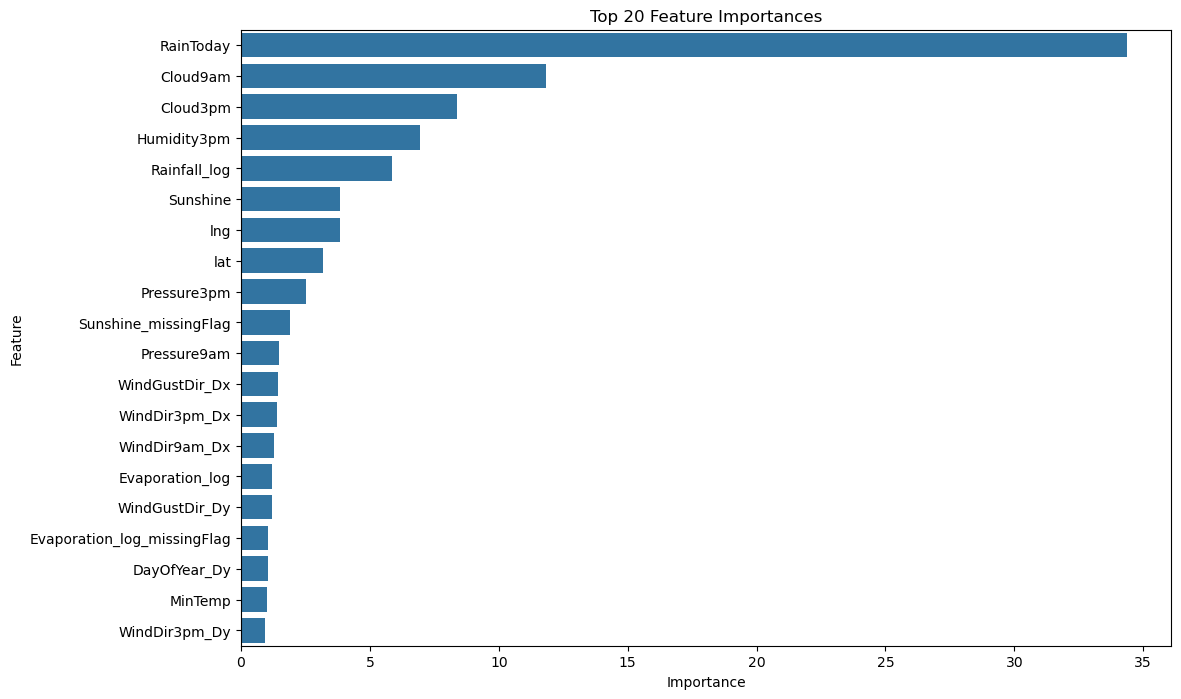

In [39]:
run_pipleline_GridSearchCV(
    random_search_cb,#change
    columnsWithoutList(x_train,col_set_dummies), 
    y_train, 
    columnsWithoutList(x_test,col_set_dummies), 
    y_test)

## Model Comparison

In [ ]:
model_data_2 = {'Model': model_name_2,
              'Accuracy': accuracy_scores_2,
              'ROC_AUC': roc_auc_scores_2,
              'Cohen_Kappa': coh_kap_scores_2,
              'Time taken': tt_2}
data_scores_2 = pd.DataFrame(model_data_2)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data_scores_2, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data_scores_2, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

In [ ]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data_scores_2, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data_scores_2, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

In [ ]:
data_scores_2

In [ ]:
data_scores
data_scores_2
# Clustered bar chart comparing model accuracies from both data_scores and data_scores_2

# Merge the two DataFrames for plotting
df1 = data_scores[['Model', 'Accuracy', 'Time taken']].copy()
df1['Type'] = 'Original'
df2 = data_scores_2[['Model', 'Accuracy', 'Time taken']].copy()
df2['Type'] = 'GridSearchCV/TimeSeriesSplit'
df_all = pd.concat([df1, df2], ignore_index=True)

plt.figure(figsize=(12, 8))
bar = sns.barplot(x='Model', y='Accuracy', hue='Type', data=df_all)
plt.title('Model Accuracy Comparison (Clustered Bar Chart)')
plt.ylim(0, 1)
plt.legend(title='Result Type')
plt.ylabel('Accuracy')

# Add stacked line chart for Time taken
ax2 = plt.twinx()
for t, group in df_all.groupby('Type'):
    ax2.plot(group['Model'], group['Time taken'], marker='o', label=f'Time Taken ({t})')
ax2.set_ylabel('Time Taken (s)')
ax2.legend(loc='upper left', bbox_to_anchor=(1.01, 1))

plt.tight_layout()
plt.show()


In [ ]:
data_scores
data_scores_2
# Clustered bar chart comparing model accuracies from both data_scores and data_scores_2

# Merge the two DataFrames for plotting
df1 = data_scores[['Model', 'Accuracy', 'Time taken']].copy()
df1['Type'] = 'Original'
df2 = data_scores_2[['Model', 'Accuracy', 'Time taken']].copy()
df2['Type'] = 'GridSearchCV/TimeSeriesSplit'
df_all = pd.concat([df1, df2], ignore_index=True)

plt.figure(figsize=(12, 8))
# Use different color palettes for bar and line charts for clear differentiation
bar_palette = 'pastel'  # Bar chart palette
line_colors = {'Original': '#1f77b4', 'GridSearchCV/TimeSeriesSplit': '#ff7f0e'}  # Line chart colors

bar = sns.barplot(x='Model', y='Accuracy', hue='Type', data=df_all, palette=bar_palette)
plt.title('Model Accuracy Comparison (Clustered Bar Chart)')
plt.ylim(0, 1)
plt.ylabel('Accuracy')

# Move bar legend outside (right bottom)
plt.legend(title='Result Type', loc='lower left', bbox_to_anchor=(1.02, 0.05), borderaxespad=0)

# Add line chart for Time taken with distinct colors
ax2 = plt.twinx()
for t, group in df_all.groupby('Type'):
    ax2.plot(group['Model'], group['Time taken'], marker='o', label=f'Time Taken ({t})', color=line_colors[t], linewidth=2)
ax2.set_ylabel('Time Taken (s)')
# Move line legend outside (right bottom)
ax2.legend(loc='lower left', bbox_to_anchor=(1.02, 0.18), borderaxespad=0)

plt.tight_layout()
plt.show()

In [ ]:
datetime.now().strftime("%Y-%m-%d %H:%M:%S")